# Checkpoint 1
## (Do not remove any comments that start with"# @@@".)

Reminder:

- You are being evaluated for completion and effort in this checkpoint.
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@".

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [ ]:
df = pd.read_csv('‘states_edu.csv’')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

In [ ]:
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 8 Math

How many years of data are logged in our dataset?

In [ ]:
# @@@ 1
# Your Code
years_in_dataset = df['YEAR'].unique()
print("Data in Years:", years_in_dataset)
print("Number of Years:", len(years_in_dataset))

Data in Years: [1992 2000 2003 2005 2007 2009 2011 2013 2015 1990 2017 1996 2019]
Number of Years: 13


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [ ]:
# @@@ 2
find_state_averages = df.groupby('STATE')['AVG_MATH_8_SCORE'].mean()

michigan_average = find_state_averages['MICHIGAN']
ohio_average = find_state_averages['OHIO']

print("MICHIGAN AVERAGE:", michigan_average)
print("OHIO AVERAGE:", ohio_average)

if michigan_average > ohio_average:
    print("MICHIGAN has a larger mean value than OHIO.")
if michigan_average < ohio_average:
    print("OHIO has a larger mean value than MICHIGAN.")

MICHIGAN AVERAGE: 276.1666666666667
OHIO AVERAGE: 282.25
OHIO has a larger mean value than MICHIGAN.


Find the average for your chosen test across all states in 2019

In [ ]:
# @@@ 3
average_math_grade_eight_2019 = df[df['YEAR'] == 2019]['AVG_MATH_8_SCORE'].mean()
print("Average Math Grade 8 Score in 2019:", average_math_grade_eight_2019)

Average Math Grade 8 Score in 2019: 281.2641509433962


For each state, find a maximum value for your chosen test score

In [ ]:
# @@@ 4
maximum_value_per_state_math_grade_eight = df.groupby('STATE')['AVG_MATH_8_SCORE'].max()
print("Maximum Value Per State:")
print(maximum_value_per_state_math_grade_eight)

Maximum Value Per State:
STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSE

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable.

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [ ]:
# @@@ 5
# Code for finding the average expenditure per student for each state to take math grade eight examinations
state_expenditures = df.groupby("STATE")["EXPENDITURE_PER_STUDENT"].mean()
print("Average Expenditure Per Student Per State - Math Grade Eight:")
print(state_expenditures)

Average Expenditure Per Student Per State - Math Grade Eight:
STATE
ALABAMA                  9.072195
ALASKA                  17.136268
ARIZONA                  8.218995
ARKANSAS                 9.560503
CALIFORNIA              10.814855
COLORADO                10.122061
CONNECTICUT             15.872821
DELAWARE                14.681299
DISTRICT_OF_COLUMBIA    21.573498
DODEA                         NaN
FLORIDA                  9.830982
GEORGIA                  9.951223
HAWAII                  11.235035
IDAHO                    7.166621
ILLINOIS                12.256986
INDIANA                 10.585435
IOWA                    11.404315
KANSAS                  10.280909
KENTUCKY                 9.402146
LOUISIANA               10.183108
MAINE                   12.634922
MARYLAND                13.203709
MASSACHUSETTS           14.860576
MICHIGAN                12.012834
MINNESOTA               12.412121
MISSISSIPPI              8.083702
MISSOURI                10.063043
MONTANA       

Feature engineering justification: I decided to create my own feature as opposed to modify an old one because I was curious to see which state was spending the most money on its student body to take the examinations. In order to do this, I set a variable equal to the data frame that would find the average amount each state spends on its expenditures for its students to take the grade eight math examinations. And then, in order to visibly have the values printed when I run the code, I added "print(state_expenditures)" to the end of the code.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

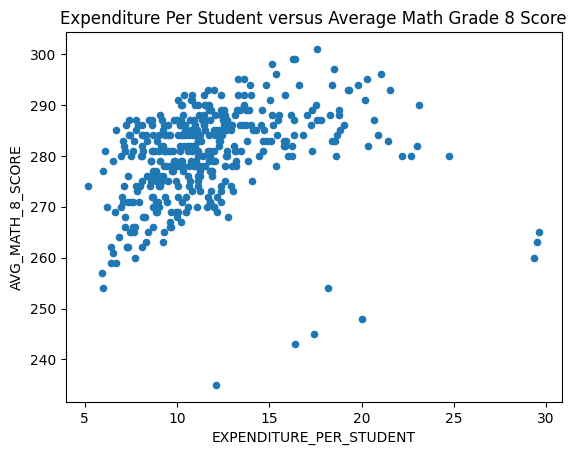

In [ ]:
# @@@ 6
# Drop rows with missing values in the columns needed for plotting
df_plot = df.dropna(subset=['EXPENDITURE_PER_STUDENT', 'AVG_MATH_8_SCORE']).copy()

# Create the scatter plot
df_plot.plot.scatter(x="EXPENDITURE_PER_STUDENT",
                     y="AVG_MATH_8_SCORE",
                     title = "Expenditure Per Student versus Average Math Grade 8 Score")
plt.show()

Eight Grade Math Scores Per Amount of Expenditures

**Visualization 2**

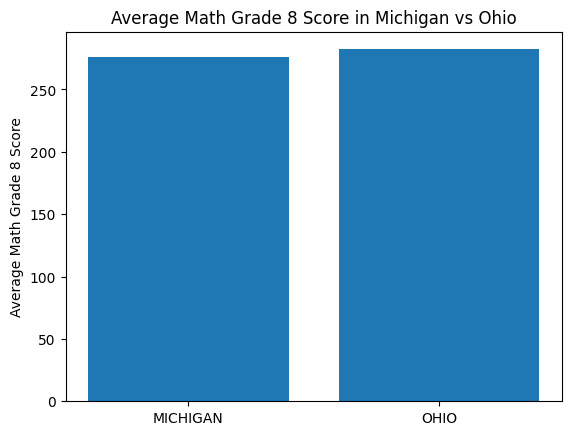

In [ ]:
# @@@ 7
# Use the previously calculated averages for Michigan and Ohio
plt.bar(["MICHIGAN", "OHIO"], [michigan_average, ohio_average])
plt.ylabel("Average Math Grade 8 Score")
plt.title("Average Math Grade 8 Score in Michigan vs Ohio")
plt.show()

**Grade Eight Mathematics Scores: Michigan versus Ohio**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# @@@ 8
df_model = df.dropna(subset=['EXPENDITURE_PER_STUDENT', 'AVG_MATH_8_SCORE']).copy()

X = df_model[['EXPENDITURE_PER_STUDENT']]
y = df_model['AVG_MATH_8_SCORE']

In [ ]:
# @@@ 9
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [ ]:
# @@@ 10
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [ ]:
# @@@ 11
# create your model here
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [ ]:
# @@@ 12
# Mean Squared Error
mse = np.mean((model.predict(X_test) - y_test) ** 2)
print("Mean Squared Error:", mse)


# Mean Average Error
mae = np.mean(np.abs(model.predict(X_test) - y_test))
print("Mean Absolute Error:", mae)

# Root Mean Squared Error
rmse = np.mean((model.predict(X_test) - y_test) ** 2) ** 0.5
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 83.52440300543458
Mean Absolute Error: 6.53717427274275
Root Mean Squared Error: 9.139168616752542


We have copied over the graphs that visualize the model's performance on the training and testing set.

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

In [ ]:
# @@@ 13

col_name = "EXPENDITURE_PER_STUDENT"


# f = plt.figure(figsize=(12,6))
# plt.scatter(X_train[col_name], y_train, color = "red")
# plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

# plt.legend(['True Training','Predicted Training'])
# plt.xlabel(col_name)
# plt.ylabel('Grade Eight Mathematics Examination Scores')
# plt.title("Model Behavior On Training Set")

In [ ]:
# @@@ 14


# col_name = 'EXPENDITURE_PER_STUDENT'


# f = plt.figure(figsize=(12,6))
# plt.scatter(X_test[col_name], y_test, color = "blue")
# plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

# plt.legend(['True testing','Predicted testing'])
# plt.xlabel(col_name)
# plt.ylabel('Grade Eight Math Scores')
# plt.title("Model Behavior on Testing Set")